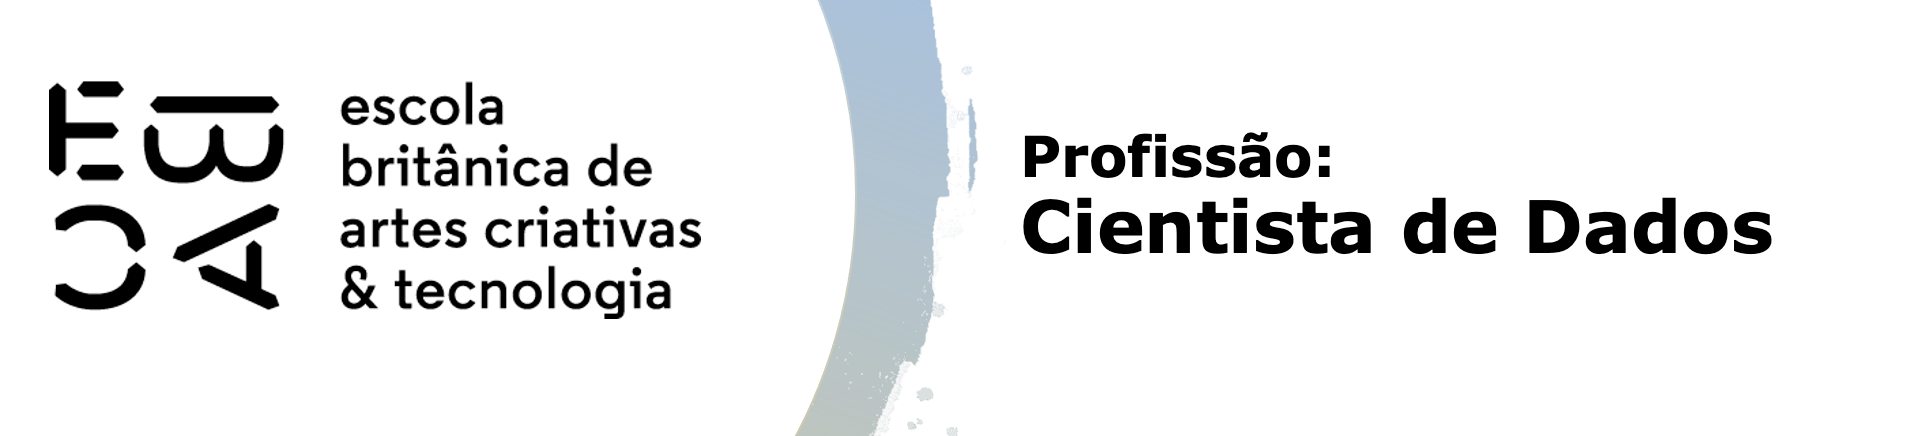

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

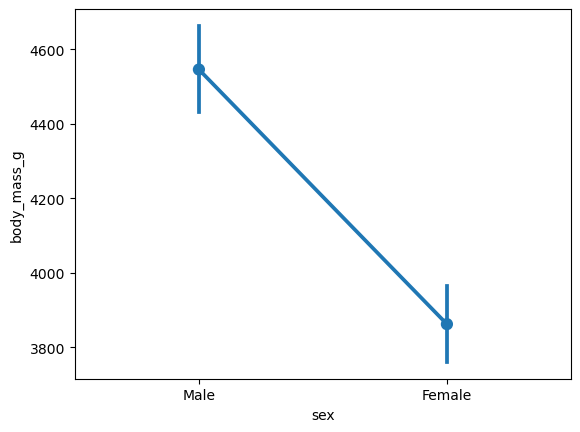

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

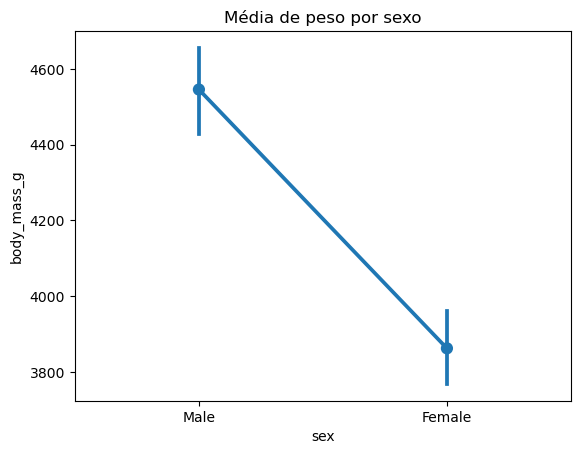

Estatística t = 8.555, p-valor = 0.0000


In [7]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

# Carrega a base
pg = sns.load_dataset('penguins')
pg = pg.dropna(subset=['sex', 'body_mass_g'])  # remove valores ausentes

# Visualização
sns.pointplot(data=pg, x='sex', y='body_mass_g')
plt.title("Média de peso por sexo")
plt.show()

# Teste T entre machos e fêmeas
male_mass = pg[pg['sex'] == 'Male']['body_mass_g']
female_mass = pg[pg['sex'] == 'Female']['body_mass_g']
t_stat, p_value = st.ttest_ind(male_mass, female_mass, equal_var=False)

print(f'Estatística t = {t_stat:.3f}, p-valor = {p_value:.4f}')


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

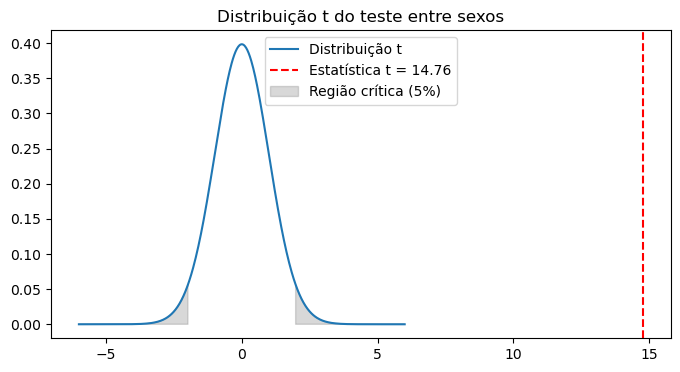

In [11]:
# Distribuição t teórica
df = min(len(male_mass), len(female_mass)) - 1
x = np.linspace(-6, 6, 500)
y = st.t.pdf(x, df)

# Visualiza a região crítica
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Distribuição t')
plt.axvline(t_stat, color='red', linestyle='--', label=f'Estatística t = {t_stat:.2f}')
plt.fill_between(x, y, where=(x < st.t.ppf(0.025, df)) | (x > st.t.ppf(0.975, df)), color='gray', alpha=0.3, label='Região crítica (5%)')
plt.title("Distribuição t do teste entre sexos")
plt.legend()
plt.show()


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [12]:
for especie in pg['species'].unique():
    subset = pg[pg['species'] == especie].dropna(subset=['sex', 'body_mass_g'])
    m = subset[subset['sex'] == 'Male']['body_mass_g']
    f = subset[subset['sex'] == 'Female']['body_mass_g']
    if len(m) > 1 and len(f) > 1:
        t_stat, p = st.ttest_ind(m, f, equal_var=False)
        print(f"{especie}: t = {t_stat:.2f}, p-valor = {p:.4f}")
    else:
        print(f"{especie}: Dados insuficientes para o teste")


Adelie: t = 13.13, p-valor = 0.0000
Chinstrap: t = 5.21, p-valor = 0.0000
Gentoo: t = 14.76, p-valor = 0.0000
